# Daria Bromot - FS500047

## K Means Clustering Project 

### Import Libraries

**Import the libraries you usually use for data analysis.**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Get the Data

**Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [81]:
college_data = pd.read_csv('College_Data', index_col=0)

**Check the head of the data**

In [82]:
college_data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Check the info() and describe() methods on the data.**

In [83]:
college_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [84]:
college_data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### EDA

**Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column.**

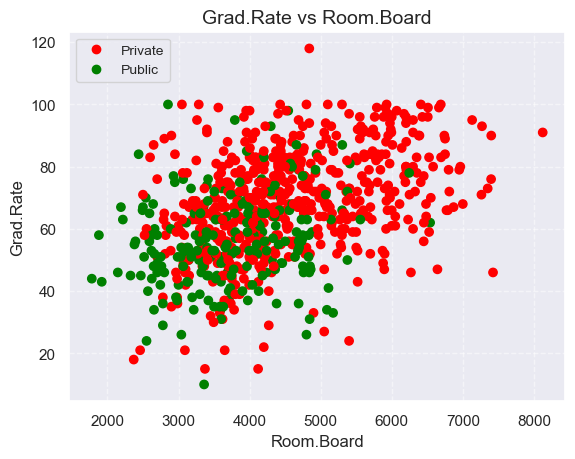

In [85]:
# Scatterplot of Grad.Rate versus Room.Board colored by the Private column
plt.scatter(college_data['Room.Board'], college_data['Grad.Rate'], c=college_data['Private'].map({'Yes': 'red', 'No': 'green'}))

# Set axis labels
plt.xlabel('Room.Board', fontsize=12)
plt.ylabel('Grad.Rate', fontsize=12)

# Add a legend
private_patch = plt.Line2D([], [], marker='o', color='red', linestyle='', label='Private')
public_patch = plt.Line2D([], [], marker='o', color='green', linestyle='', label='Public')
plt.legend(handles=[private_patch, public_patch], loc='upper left', fontsize=10)

# Add a grid
plt.grid(True, linestyle='--', alpha=0.5)

# Set the title
plt.title('Grad.Rate vs Room.Board', fontsize=14)

# Display the plot
plt.show()


**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

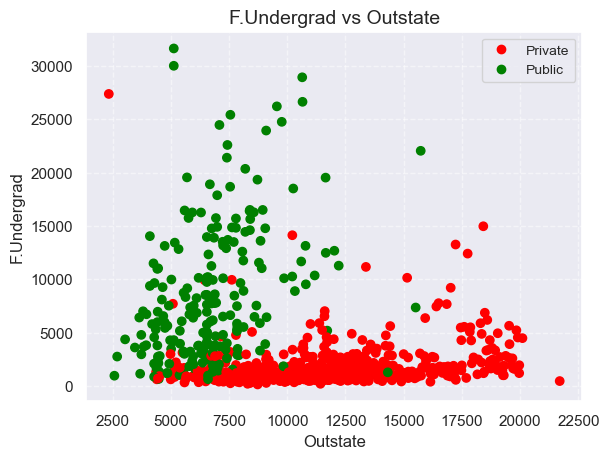

In [86]:
# Scatterplot of F.Undergrad versus Outstate colored by the Private column
plt.scatter(college_data['Outstate'], college_data['F.Undergrad'], c=college_data['Private'].map({'Yes': 'red', 'No': 'green'}))

# Set axis labels
plt.xlabel('Outstate', fontsize=12)
plt.ylabel('F.Undergrad', fontsize=12)

# Add a legend
private_patch = plt.Line2D([], [], marker='o', color='red', linestyle='', label='Private')
public_patch = plt.Line2D([], [], marker='o', color='green', linestyle='', label='Public')
plt.legend(handles=[private_patch, public_patch], loc='upper right', fontsize=10)

# Add a grid
plt.grid(True, linestyle='--', alpha=0.5)

# Set the title
plt.title('F.Undergrad vs Outstate', fontsize=14)

# Display the plot
plt.show()


**Create a stacked histogram showing Out of State Tuition based on the Private column. Try doing this using sns.FacetGrid. If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist').**

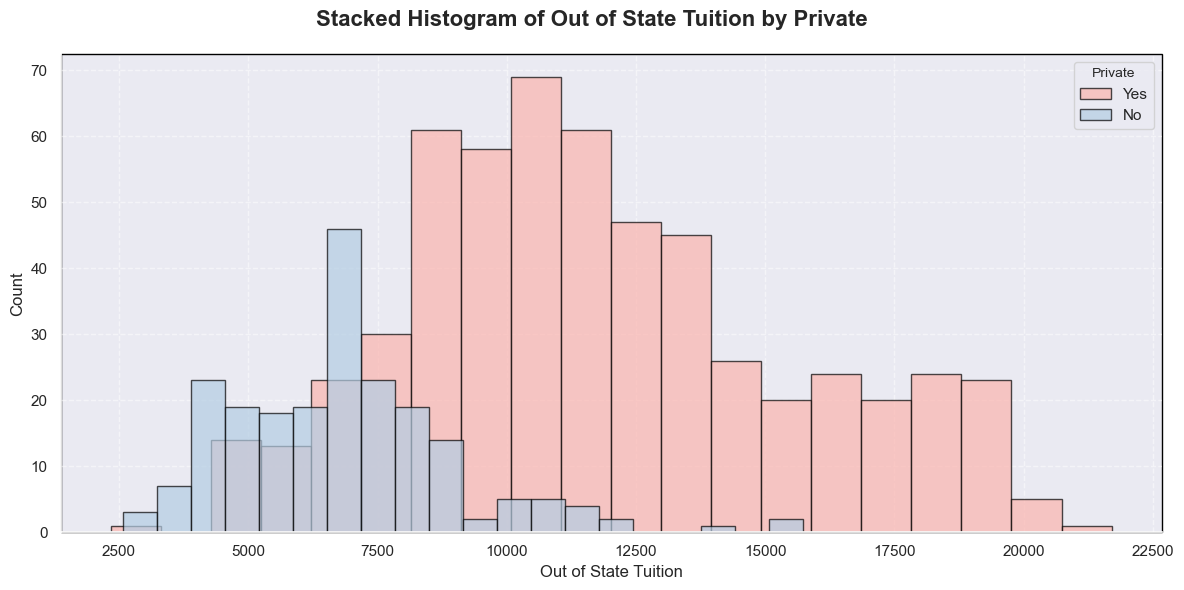

In [87]:
sns.set_palette('Pastel1')

# Create a FacetGrid with Private as the hue
g = sns.FacetGrid(college_data, hue="Private", height=6, aspect=2)

# Plot a histogram for Outstate in each hue with customizations
g.map(plt.hist, 'Outstate', bins=20, alpha=0.7, edgecolor='black', linewidth=1, linestyle='-', )

# Set labels and title with custom styles
g.set_axis_labels("Out of State Tuition", "Count", fontsize=12)
g.fig.suptitle("Stacked Histogram of Out of State Tuition by Private",  fontsize=16, fontweight='bold')

# Add gridlines, shadow, and legend
g.ax.grid(True, linestyle='--', alpha=0.5)
g.ax.legend(title="Private", title_fontsize=10)

# Add a shadow to the plot
g.ax.set_axisbelow(True)
g.ax.patch.set_edgecolor('black')
g.ax.patch.set_linewidth('1')

# Adjust the spacing between subplots and set tight layout
plt.tight_layout()

# Show the plot
plt.show()


**Create a similar histogram for the Grad.Rate column.**

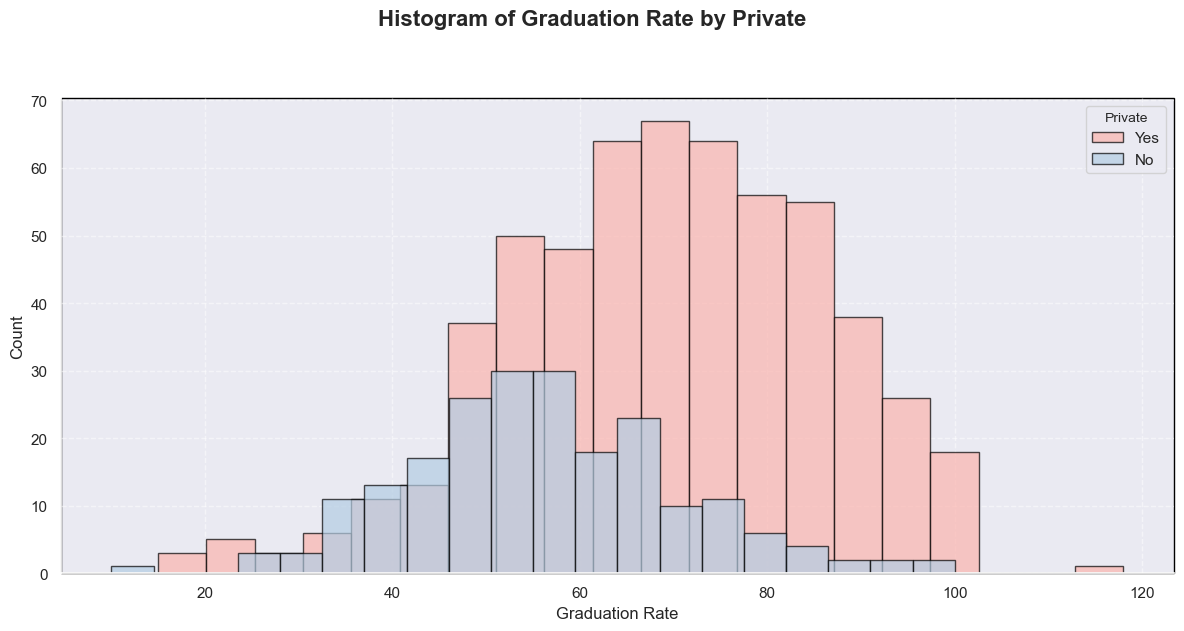

In [88]:
# Create a FacetGrid with Private as the hue
g = sns.FacetGrid(college_data, hue="Private", height=6, aspect=2)

# Plot a histogram for Grad.Rate in each hue with customizations
g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7, edgecolor='black', linewidth=1, linestyle='-')

# Set labels and title with custom styles
g.set_axis_labels("Graduation Rate", "Count", fontsize=12)
g.fig.suptitle("Histogram of Graduation Rate by Private", y=1.05, fontsize=16, fontweight='bold')

# Add gridlines, shadow, and legend
g.ax.grid(True, linestyle='--', alpha=0.5)
g.ax.legend(title="Private", title_fontsize=10)

# Add a shadow to the plot
g.ax.set_axisbelow(True)
g.ax.patch.set_edgecolor('black')
g.ax.patch.set_linewidth('1')

# Adjust the spacing between subplots and set tight layout
plt.tight_layout()

# Show the plot
plt.show()


**Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?**

In [89]:
college_data[(college_data['Private'] == 'Yes') & (college_data['Grad.Rate'] > 100)]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [90]:
school_name = college_data[(college_data['Private'] == 'Yes') & (college_data['Grad.Rate'] > 100)]['Private'].index[0]

print("School with a graduation rate higher than 100%:", school_name)


School with a graduation rate higher than 100%: Cazenovia College


**Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

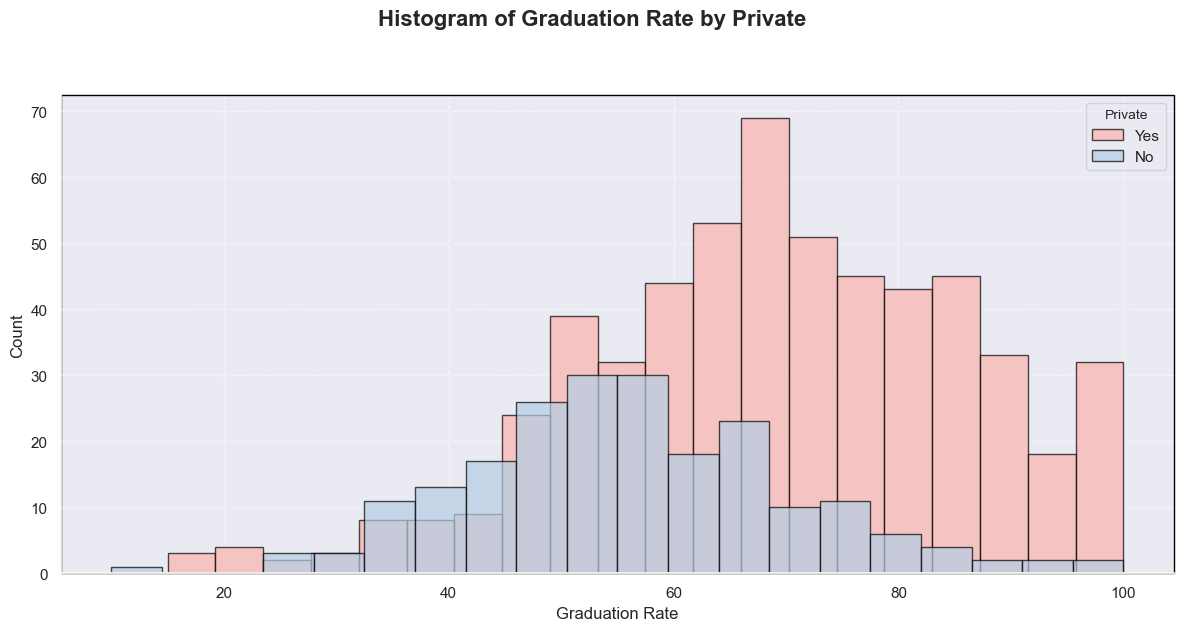

In [91]:
# Update the graduation rate to 100
college_data.loc[school_name, 'Grad.Rate'] = 100

g = sns.FacetGrid(college_data, hue="Private", height=6, aspect=2)
g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7, edgecolor='black', linewidth=1, linestyle='-')
g.set_axis_labels("Graduation Rate", "Count", fontsize=12)
g.fig.suptitle("Histogram of Graduation Rate by Private", y=1.05, fontsize=16, fontweight='bold')
g.ax.grid(True, linestyle='--', alpha=0.5)
g.ax.legend(title="Private", title_fontsize=10)
g.ax.set_axisbelow(True)
g.ax.patch.set_edgecolor('black')
g.ax.patch.set_linewidth('1')
plt.tight_layout()
plt.show()


### K Means Cluster Creation

**Import KMeans from SciKit Learn.**

In [92]:
from sklearn.cluster import KMeans

**Create an instance of a K Means model with 2 clusters.**

In [107]:
kmeans = KMeans(n_clusters=2)

**Fit the model to all the data except for the Private label.**

In [108]:
columns_for_clustering = college_data.drop("Private", axis=1)

kmeans.fit(columns_for_clustering)

KMeans(n_clusters=2)

In [109]:
columns_for_clustering

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,2
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,2
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,2
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,2
Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,2
Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,2
Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,0


**What are the cluster center vectors?**

In [110]:
cluster_centers = kmeans.cluster_centers_

print(cluster_centers)

[[1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.50926756e+01 1.32286996e+00]
 [1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01 7.59259259e-01]]


### Evaluation

**Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [112]:
college_data['Cluster'] = college_data['Private'].apply(lambda x: 1 if x == 'Yes' else 0)

In [113]:
college_data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [114]:
# Get cluster labels
cluster_labels = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(columns_for_clustering, cluster_labels)

print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5599267928788714


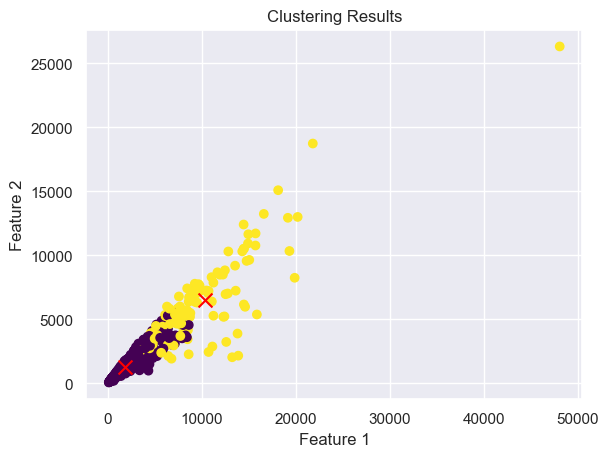

In [111]:
# Create a scatter plot of the data points, color-coded by cluster label
plt.scatter(columns_for_clustering.iloc[:, 0], columns_for_clustering.iloc[:, 1], c=cluster_labels, cmap='viridis')

# Plot cluster centers as red crosses
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=100)

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Results')

# Display the plot
plt.show()


**Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [115]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
cm = confusion_matrix(college_data['Cluster'], kmeans.labels_)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Generate and print the classification report
print("\nClassification Report:")
print(classification_report(college_data['Cluster'], kmeans.labels_))


Confusion Matrix:
[[138  74]
 [531  34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



Confusion Matrix:
- The top-left value (138) represents the number of instances correctly classified as public schools (0) by the KMeans algorithm.
- The top-right value (74) indicates the number of instances misclassified as private schools (1) by the algorithm.
- The bottom-left value (531) represents the number of instances misclassified as public schools (0) by the algorithm.
- The bottom-right value (34) indicates the number of instances correctly classified as private schools (1) by the algorithm.

Classification Report:
- The overall accuracy of the clustering algorithm is 0.22, which is relatively low. The macro average and weighted average F1-scores are 0.21 and 0.16, respectively. These scores indicate the overall performance of the clustering algorithm across both classes.

### Improve the model

We change:
- The features are scaled using StandardScaler to ensure they are on a similar scale.
- Dimensionality reduction is performed using PCA to reduce the feature space to two dimensions for visualization purposes.
- The optimal number of clusters is determined using the silhouette score as an evaluation metric.
- The KMeans clustering model is trained with the optimal number of clusters.
- The cluster labels are added to the DataFrame.
- The clustering is evaluated using the silhouette score.
- The cluster center vectors are printed to inspect the resulting clusters.

In [130]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Experiment with different feature scaling methods
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'Normalizer': Normalizer()
}

# Experiment with different PCA settings
n_components = [2, 3, 4]

# Determine the best combination of feature scaling and PCA
best_silhouette_score = -1
best_scaler = None
best_pca = None

for scaler_name, scaler in scalers.items():
    scaled_data = scaler.fit_transform(college_data.drop(['Private', 'Cluster'], axis=1))
    
    for n_comp in n_components:
        pca = PCA(n_components=n_comp)
        reduced_data = pca.fit_transform(scaled_data)

        kmeans = KMeans(n_clusters=2, random_state=42)  # Set n_clusters to 2

        labels = kmeans.fit_predict(reduced_data)
        silhouette_avg = silhouette_score(reduced_data, labels)

        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_scaler = scaler_name
            best_pca = pca

# Train the KMeans clustering model with the best combination of settings
best_scaled_data = scalers[best_scaler].transform(college_data.drop(['Private', 'Cluster'], axis=1))
best_reduced_data = best_pca.transform(best_scaled_data)
kmeans = KMeans(n_clusters=2, random_state=42)  # Set n_clusters to 2
labels = kmeans.fit_predict(best_reduced_data)

# Add the cluster labels to the DataFrame
college_data['Cluster'] = labels

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(best_reduced_data, labels)
print("Best Silhouette Score:", silhouette_avg)
print("Best Scaler:", best_scaler)
print("Best PCA Components:", best_pca.n_components_)
print("Cluster Center Vectors:")
print(kmeans.cluster_centers_)


Best Silhouette Score: 0.671443736781089
Best Scaler: Normalizer
Best PCA Components: 2
Cluster Center Vectors:
[[ 0.5007232  -0.00555538]
 [-0.14235436  0.00157938]]


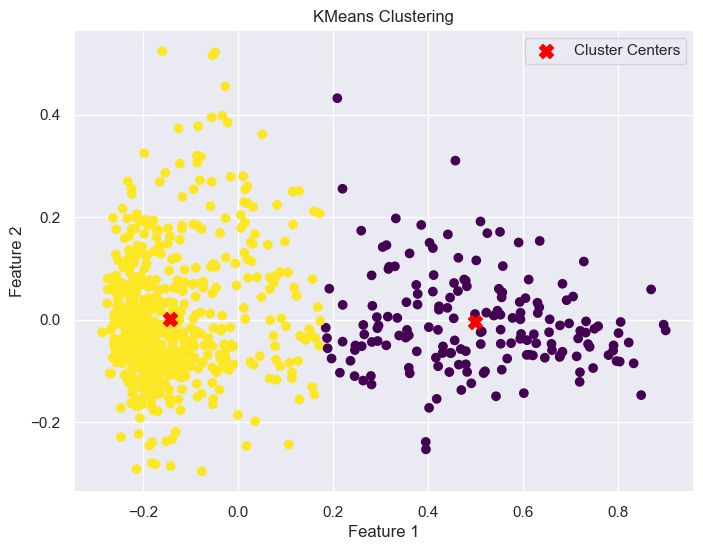

In [127]:
import matplotlib.pyplot as plt

# Scatter plot of the reduced data points colored by cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=100, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()


The first result you provided is obtained using KMeans clustering without any feature scaling or dimensionality reduction. The Silhouette Score of 0.5599 suggests a moderate level of clustering quality, where positive values indicate reasonable separation between clusters.

In the second result, you applied feature scaling using the "Normalizer" scaler and transformed the data accordingly. Then, you used the  PCA = 2. The result shows an improved Silhouette Score of 0.6714, indicating better separation and cohesion of the clusters.

The difference in results can be attributed to the preprocessing steps applied. By using feature scaling and dimensionality reduction (PCA), you transformed the data to a different representation, which can help in identifying more meaningful patterns and reducing noise. The improved Silhouette Score suggests that these preprocessing steps led to better-defined clusters.